# Generation 3 run (LSST science pipeline tutorial) using v22 (w_2021_30)
***


## Contents
***
* **[Useful links](#Useful-links)**
* **[Setting up butler repository](#setup)**
    * [Creating a butler repository](#butrepo)
    * [Registering a instrument to the butler repository](#regbut)
    * [Importing the refcats into the butler repository](#refcats)
    * [Ingesting the raws in the butler repository](#ingest)
    * [Defining the visits](#visit)
    * [Writing the curated calibrations](#calibs)
* **[Processing the LSST pipeline tutorial data](#PLptd)**
    * [ProcessCcd](#proccd)
    * [Coaddtions](#coadds)
    * [Multiband](#mband)
        * [Detection task](#D)
        * [mergeDetection task](#MD)
        * [deblend task](#DB)
        * [Measure task](#M)



    

## Useful links <a class="anchor" id="Useful-links"></a>
***

- https://github.com/lsst/pipe_tasks/blob/master/pipelines/DRP.yaml [1]
- https://pipelines.lsst.io/v/weekly/modules/lsst.daf.butler/scripts/butler.html [2]
- https://github.com/lsst [3]
- https://community.lsst.org/t/generation-3-butler-tutorial/4965/8 [4]
***

## Setting up butler repository <a class="anchor" id="setup"></a>
***

### Creating a butler repository <a class="anchor" id="butrep"></a>

- Note: the butler create command line task creates a directory and populates it with a butler.yaml file (base config) and a registry (sqlite3 file).

In [ ]:
! butler create GEN3_run

### Registering a instrument to the butler repository <a class="anchor" id="regbut"></a>


In [ ]:
! butler register-instrument GEN3_run/ lsst.obs.subaru.HyperSuprimeCam

### Importing the refcats into the butler repository <a class="anchor" id="refcats"></a>

- I used a hack to get the refcats into this butler repository
    - I used the butler convert command line task to convert the gen 2 repository (LSST Science pipeline tutorial) to a gen 3 repository
    - Then I used the butler import command link task to import into the new butler repository (GEN3_run)
    
- **Question - Is there a way of ingestiing the refcats in a gen 3 format ??** 

In [ ]:
! butler import GEN3_run/ ~/lsst_stack/DATA_gen3/ --export-file exports.yaml

### Ingesting the raws in the butler repository <a class="anchor" id="ingest"></a>


In [ ]:
! butler ingest-raws GEN3_run/ DATA_gen3/HSC/raw/

### Defining the visits  <a class="anchor" id="visit"></a>

In [ ]:
! butler define-visits GEN3_run/ HSC 

### Writing the curated calibrations <a class="anchor" id="calibs"></a>

In [ ]:
!butler write-curated-calibrations GEN3_run/ HSC

## Processing the LSST pipeline tutorial data <a class="anchor" id="PLptd"></a>
- I'm using the latest version on the pipe_task file"DRP.yaml" thats found on github [1]
***

### ProcessCcd <a class="anchor" id="proccd"></a>

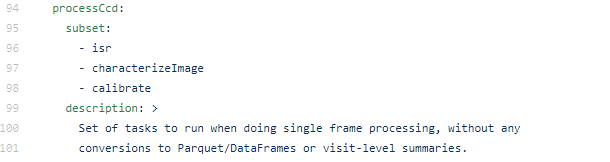

- Useful links
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/calibrate.py
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/characterizeImage.py
    - https://github.com/lsst/ip_isr/blob/master/python/lsst/ip/isr/isrTask.py <br><br>
    
- These links are very helpful when defining the configs for each task for your data (path within your conda environment (starting point is within lsst_stact directory) <br>"stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/pipe_tasks/21.0.0+44ca056b81/python/lsst/pipe/tasks/" and <br>"stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/ip_isr/21.0.0+ee58a624b3/python/lsst/ip/isr/") <br><br>

- **Question - Are the configs correct?**

In [ ]:
pipetask run  -b GEN3_run/ --input HSC/raw/all --register-dataset-types -p "${PIPE_TASKS_DIR}/pipelines/DRP.yaml"#processCcd
    --instrument lsst.obs.subaru.HyperSuprimeCam --output-run demo_collection -c isr:doBias=False -c 
    isr:doBrighterFatter=False -c isr:doDark=False -c isr:doFlat=False -c isr:doDefect=False -c 
    calibrate:doPhotoCal=False -c calibrate:doAstrometry=False

- The butler repository now looks like this 

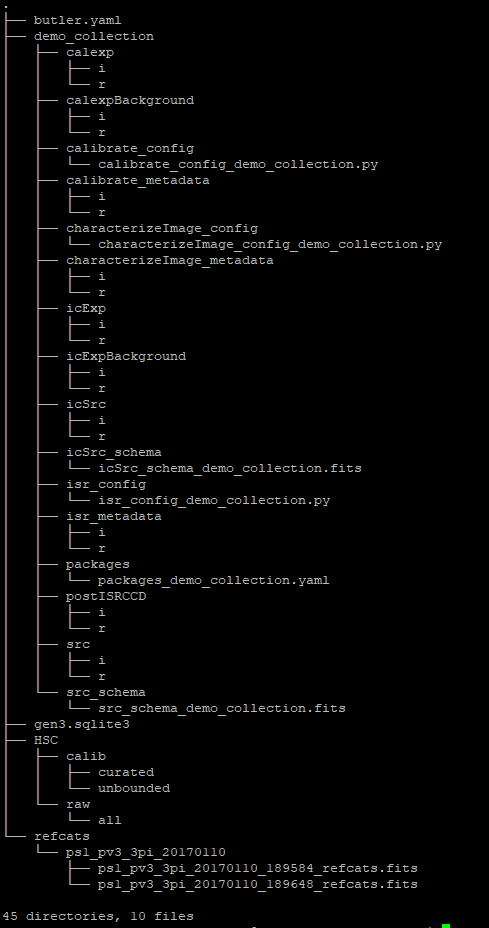

- **One thing i noticed is that this created more directories than in the gen 2 pipeline tutorial** <br>
- **I'm guessing that I'm probably running more tasks using this method ??**

### Coaddtions <a class="anchor" id="coadds"></a>

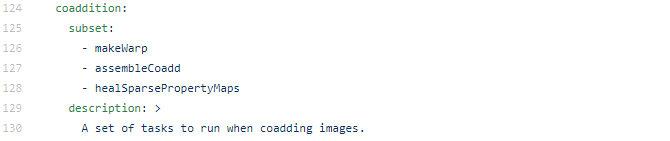
- Useful links
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/makeCoaddTempExp.py
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/assembleCoadd.py
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/healSparseMapping.py <br><br>
    
- These links are very helpful when defining the configs for each task for your data (path within your conda environment (starting point is within lsst_stact directory) <br>"stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/pipe_tasks/21.0.0+44ca056b81/python/lsst/pipe/tasks/" <br><br>

- The **healSparsePropertyMaps** was commented out. (Not relevant to the tutorial ) <br><br>   




- **Question - Are the configs correct?**


**Before you can run the coaddtions pipe task you have to run the make-discrete-skymap command line task**


- https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/script/makeDiscreteSkyMap.py


In [ ]:
! butler make-discrete-skymap test1/GEN3_run HSC --collections demo_collection

### coaddtions pipetask 

In [ ]:
! pipetask run  -b GEN3_run/ --input demo_collection --input skymaps  --register-dataset-types -p DRP.yaml#coaddition
    --instrument lsst.obs.subaru.HyperSuprimeCam --output-run coadd -c makeWarp:doApplySkyCorr=False -c
    makeWarp:doApplyExternalSkyWcs=False -c makeWarp:doApplyExternalPhotoCalib=False -c assembleCoadd:doMaskBrightObjects=False

## Potential Issue

- The "assembleCoadd:doMaskBrightObjects=False" wasn't needed when i ran this test before. I think what I've had done is a work around to get pipeline working. If "assembleCoadd:doMaskBrightObjects=True" I get this error <br><br>
 



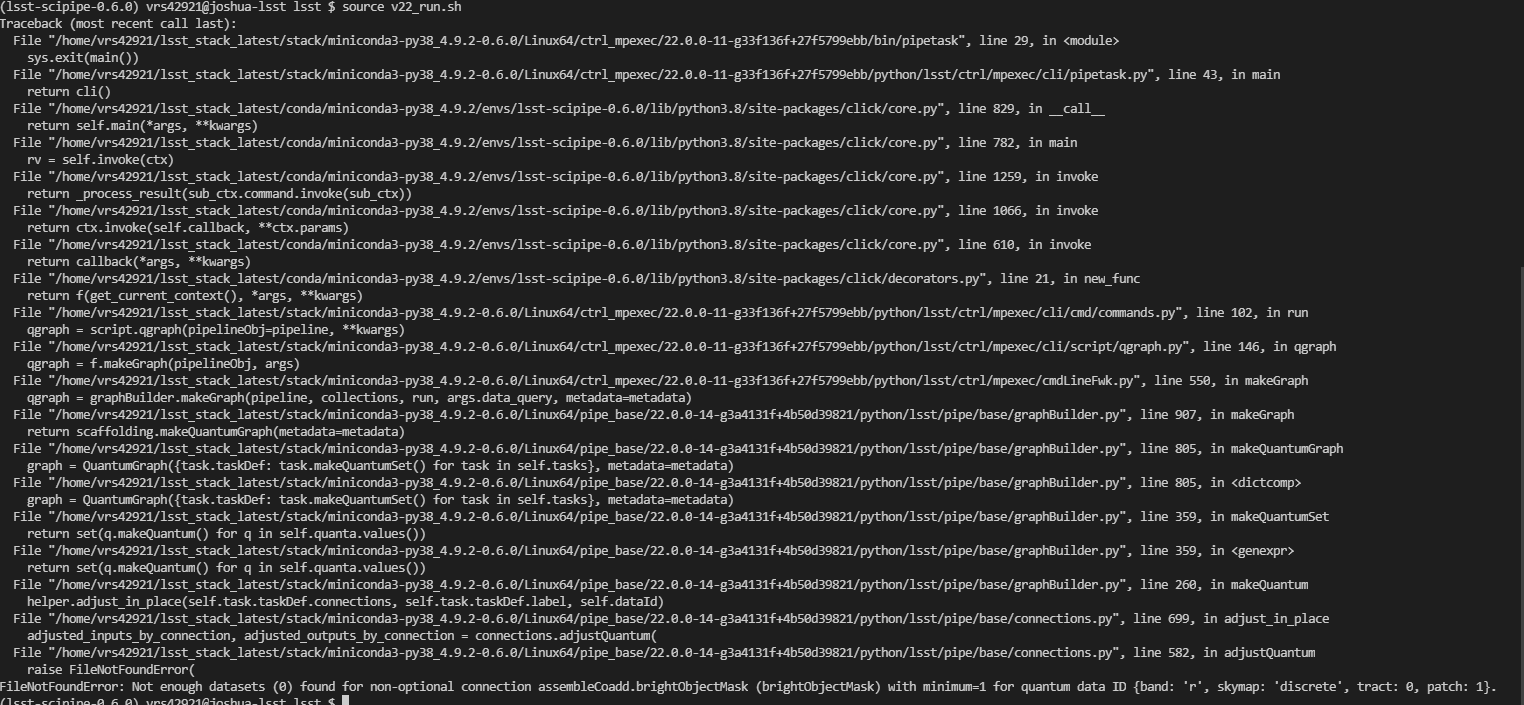

- The skymap command creates this directory within the butler repository<br><br>
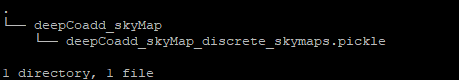

- The coaddtions pipetask directory sturture looks like this 
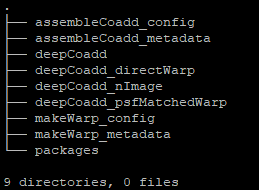

- Very similar to the gen 2 repository which was converted into gen3. (assuming that the name convention of files has cahnge from gen2 to gen3 format)

### Multiband <a class="anchor" id="mband"></a>
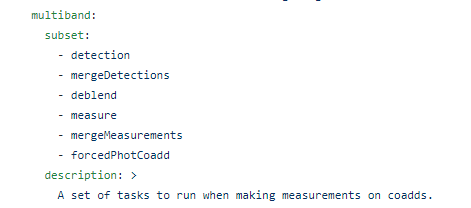

- Useful links
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/multiBand.py
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/mergeDetections.py
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/deblendCoaddSourcesPipeline.py 
    - https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/mergeMeasurements.py
    - https://github.com/lsst/meas_base/blob/master/python/lsst/meas/base/forcedPhotCcd.py <br><br>
    
- These links are very helpful when defining the configs for each task for your data (path within your conda environment (starting point is within lsst_stact directory) <br>"stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/pipe_tasks/21.0.0+44ca056b81/python/lsst/pipe/tasks/" and <br>"stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/meas_base/21.0.0+087873070b/python/lsst/meas/base/") <br><br>



### Detection task <a class="anchor" id="D"></a>

In [ ]:
! pipetask run  -b test1/GEN3_run --input demo_collection --input skymaps --input coadd --register-dataset-types 
-p DRP.yaml:detection --instrument lsst.obs.subaru.HyperSuprimeCam --output-run dec


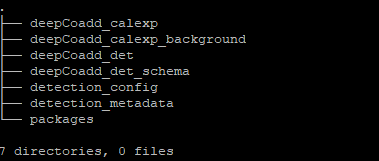

- This work without any changes to the code  

### mergeDetections task<a class="anchor" id="MD"></a>

In [ ]:
pipetask run  -b test1/GEN3_run --input demo_collection --input skymaps --input coadd --input dec  
    --register-dataset-types -p DRP.yaml:mergeDetections --instrument lsst.obs.subaru.HyperSuprimeCam 
    --output-run coaddPhot_merge_12 --debug

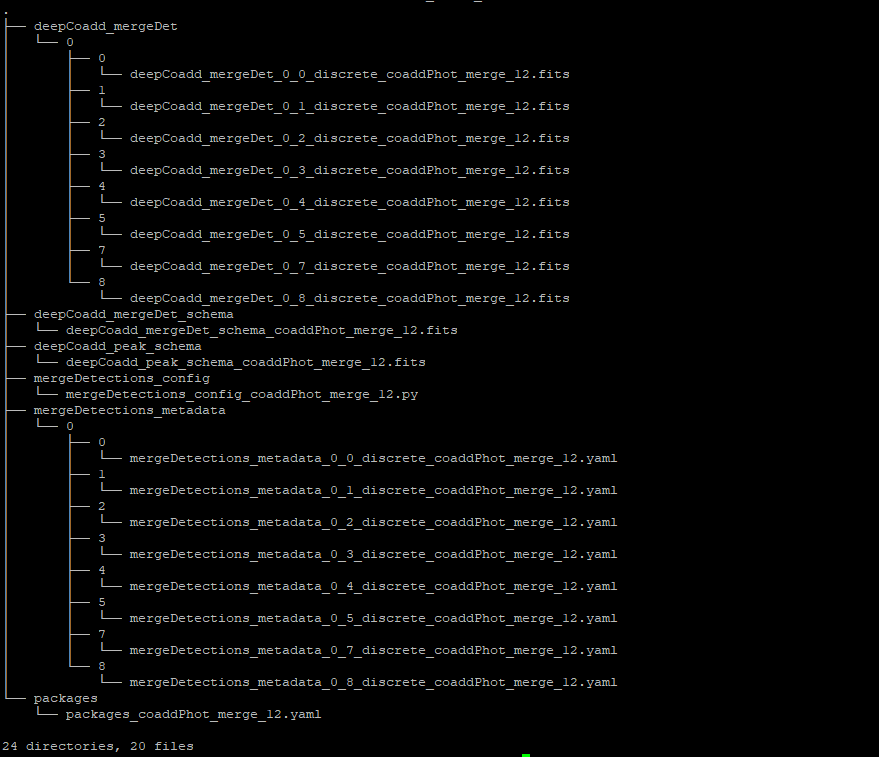

### deblend task <a class="anchor" id="DB"></a>

In [ ]:
pipetask run  -b test1/GEN3_run --input demo_collection --input skymaps --input coadd --input dec 
    --input coaddPhot_merge_12   --register-dataset-types -p DRP.yaml:deblend --instrument lsst.obs.subaru.HyperSuprimeCam 
    --output-run coaddPhot_deblend

- Here is a look at the directory<br><br>

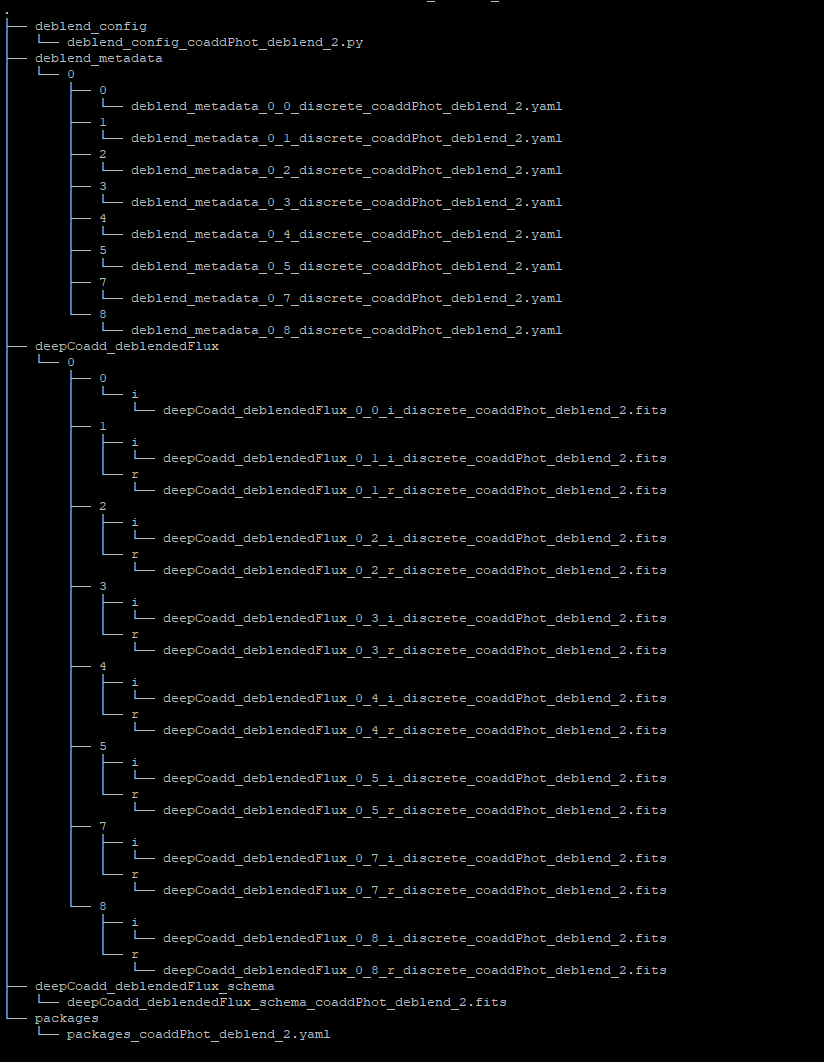


### Measure task <a class="anchor" id="M"></a>

- I haven't got this working <br><br>

- I am getting this error

- I assume it has something to with what I've done in thecoaddtions steps with the assemblecoadd ([Coaddtions](#coadds))


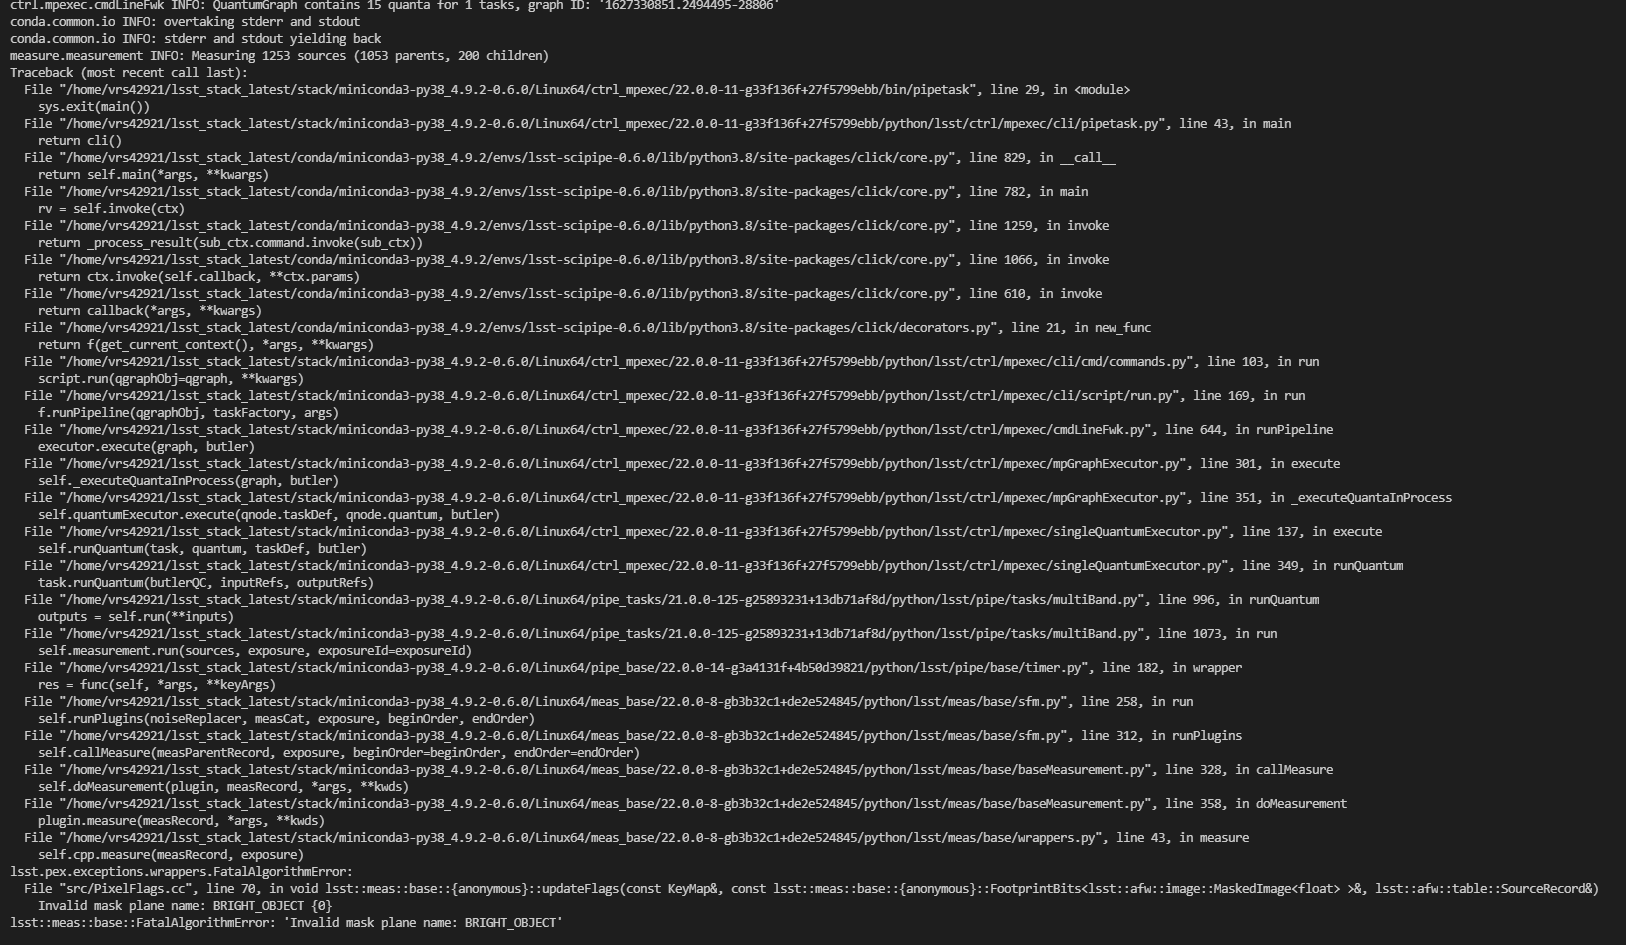